In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [113]:
# Data loading 

# read train 
train = pd.read_csv("C:\\Users\\devad\\OneDrive\\Desktop\\mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# read test 
test= pd.read_csv(r"C:\Users\devad\OneDrive\Desktop\mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

In [116]:
X_train.head(5)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
Y_train.head(5)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [118]:
Y_train.value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

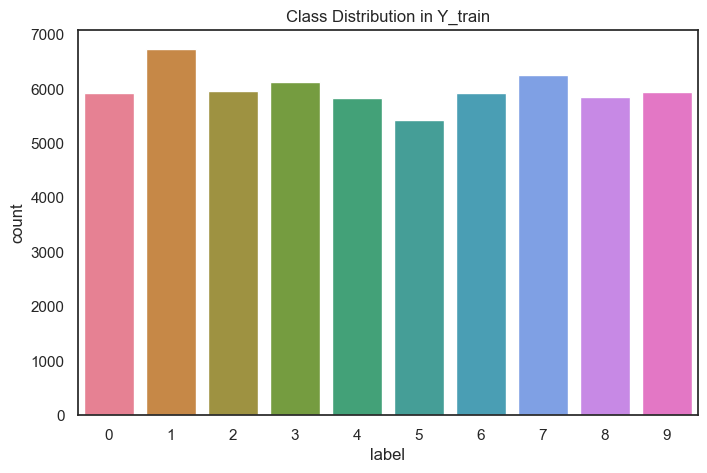

In [119]:


plt.figure(figsize=(8, 5))
sns.countplot(x=Y_train, palette="husl")  # 'husl' gives distinct colors
plt.title("Class Distribution in Y_train")
plt.show()

In [120]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [121]:
# Split features and labels
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
y_train = train_data.iloc[:, 0].values

In [122]:
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_data.iloc[:, 0].values

In [123]:
# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [124]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

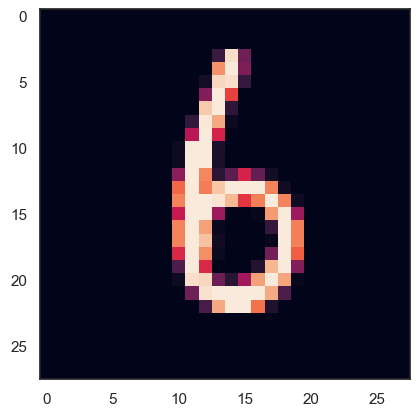

In [125]:
# Example - 
plt.imshow(X_train[33][:,:,0])

In [126]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')

In [127]:
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

#hidden layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#hidden layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [128]:
# Defining Optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [129]:
# Compiling the Model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [130]:
# Setting Learning Rate Annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [131]:
epochs = 10
batch_size = 86

In [132]:
# data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [133]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
Y_train = to_categorical(y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)


In [134]:

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

print(X_train.shape, Y_train.shape)  # Ensure both have the same number of samples
print(X_val.shape, Y_val.shape)


(54000, 28, 28, 1) (60000, 10, 10)
(6000, 28, 28, 1) (6000, 10, 10)


In [135]:
print(Y_train.shape)  # Should be (54000, 10)
print(Y_val.shape)    # Should be (6000, 10)

(60000, 10, 10)
(6000, 10, 10)


In [136]:
y_train = y_train.reshape(-1)  # Flatten before one-hot encoding
y_val = Y_val.reshape(-1)


In [137]:
print(X_train.shape, Y_train.shape)  # Should both have 54000 samples
print(X_val.shape, Y_val.shape)      # Should both have 6000 samples


(54000, 28, 28, 1) (60000, 10, 10)
(6000, 28, 28, 1) (6000, 10, 10)


In [140]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9922 - val_loss: 0.0307
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9978 - loss: 0.0058 - val_accuracy: 0.9908 - val_loss: 0.0422
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9978 - loss: 0.0063 - val_accuracy: 0.9917 - val_loss: 0.0347
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 0.9926 - val_loss: 0.0348
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9982 - loss: 0.0050 - val_accuracy: 0.9915 - val_loss: 0.0377
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.9919 - val_loss: 0.0397
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9912 - val_loss: 0.0373
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9980 - loss: 0.0057 - 

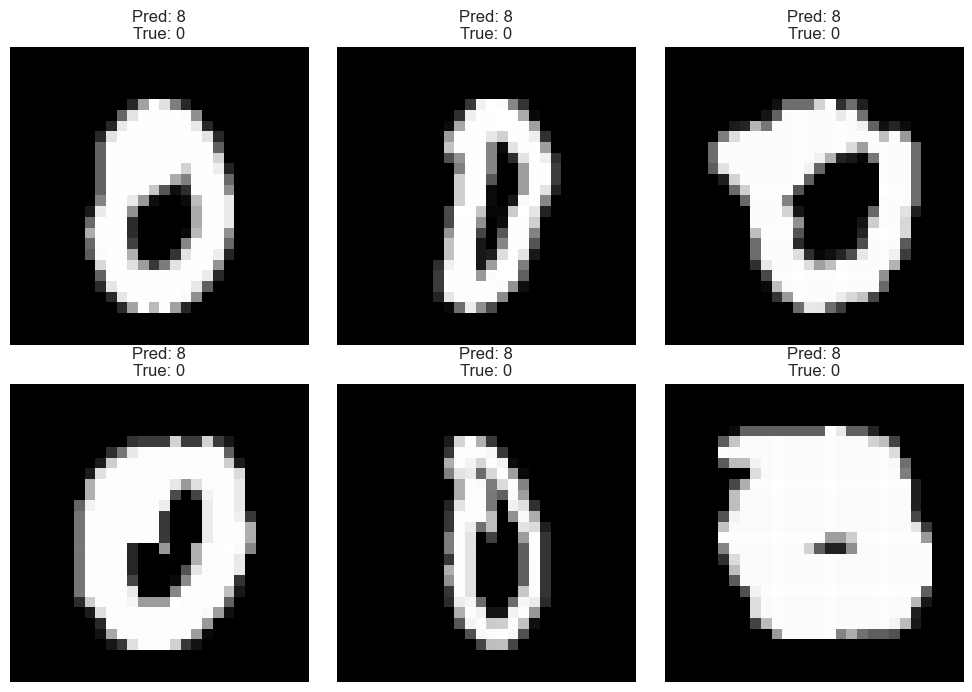

In [150]:
# Ensure Y_true is in label format (not one-hot encoded)
if len(Y_true.shape) > 1 and Y_true.shape[1] > 1:
    Y_true = np.argmax(Y_true, axis=1)  

# Find misclassified samples
errors = (Y_pred_classes != Y_true)

# Extract misclassified samples
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels """
    nrows, ncols = 2, 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(10, 7))
    
    for i, ax in enumerate(ax.flat):
        error_idx = errors_index[i]
        ax.imshow(img_errors[error_idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"Pred: {pred_errors[error_idx]}\nTrue: {obs_errors[error_idx]}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Find confidence scores of predictions
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)
true_prob_errors = np.array([Y_pred_errors[i, Y_true_errors[i]] for i in range(len(Y_true_errors))])

# Compute difference between predicted and true confidence
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sort by the biggest mistakes
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Select top 6 most important errors
most_important_errors = sorted_delta_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [148]:
print(test.shape)  # Find out the actual dimensions


(10000, 785)


In [151]:
test = test[:, 1:]  # Remove first column


InvalidIndexError: (slice(None, None, None), slice(1, None, None))

In [152]:
if test.shape[1] == 785:
    test = test.iloc[:, 1:]  # Correct way to remove the first column in Pandas


In [153]:
import numpy as np
import pandas as pd

# Check test data shape before reshaping
print("Original shape:", test.shape)

# If an extra column exists, remove it
if test.shape[1] == 785:
    test = test[:, 1:]  # Remove first column

# Reshape for CNN input
test = test.reshape(-1, 28, 28, 1)  

# Normalize pixel values
test = test.astype(np.float32) / 255.0  

# Make predictions
results = model.predict(test)

# Get predicted class labels
results = np.argmax(results, axis=1)

# Convert to pandas Series
results = pd.Series(results, name="Label")

print("Predictions completed successfully!")


Original shape: (10000, 784)


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [146]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [147]:
submission

,ImageId,Label
0,1,8.0
1,2,8.0
2,3,8.0
3,4,8.0
4,5,8.0
...,...,...
27995,27996,NaN
27996,27997,NaN
27997,27998,NaN
27998,27999,NaN


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.8755 - loss: 0.4038 - val_accuracy: 0.9858 - val_loss: 0.0437
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9832 - loss: 0.0560 - val_accuracy: 0.9869 - val_loss: 0.0378
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9878 - loss: 0.0372 - val_accuracy: 0.9884 - val_loss: 0.0372
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9914 - loss: 0.0279 - val_accuracy: 0.9910 - val_loss: 0.0287
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9934 - loss: 0.0216 - val_accuracy: 0.9900 - val_loss: 0.0346
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9899 - val_loss: 0.0359
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9910 - val_loss: 0.0352
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9956 - loss: 0.0130 - 

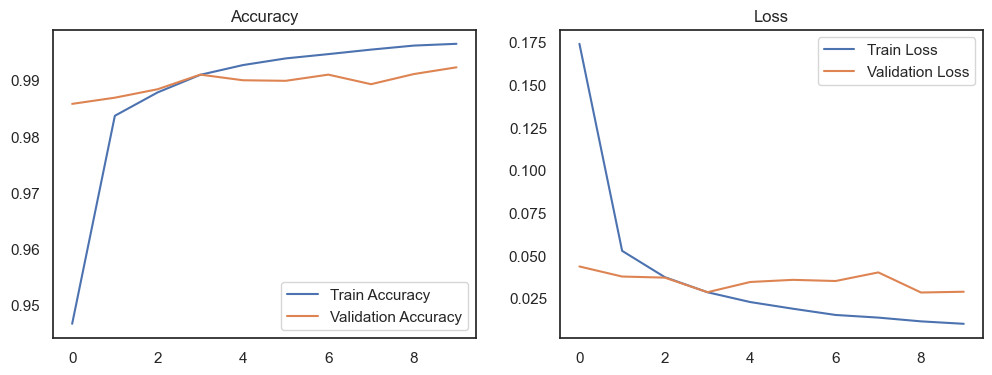

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
train_data = pd.read_csv("C:\\Users\\devad\\OneDrive\\Desktop\\mnist_train.csv")
test_data = pd.read_csv("C:\\Users\\devad\\OneDrive\\Desktop\\mnist_test.csv")

# Split features and labels
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_data.iloc[:, 0].values

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()
